Precisión promedio (Accuracy): 0.75
Área bajo la curva ROC (AUC): 0.49


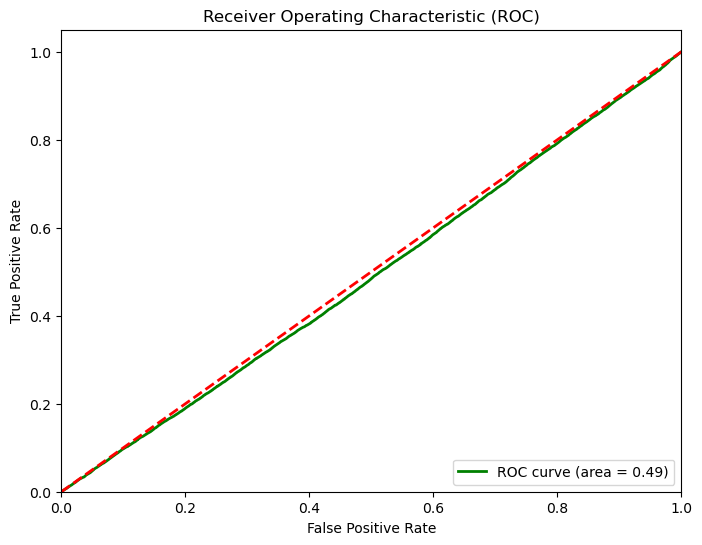

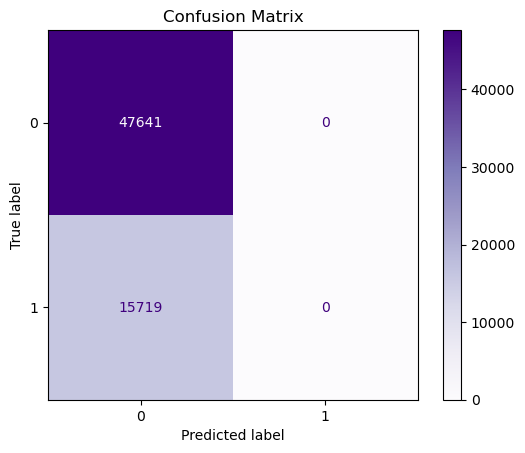

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
data = pd.read_csv('C:/python/Cleaned-Data.csv')

# Preparar los datos
target = data['Severity_Severe']
features = data.drop(columns=['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe', 'Country'])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Entrenar un modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluar el modelo
accuracy_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
average_accuracy = np.mean(accuracy_scores)
print(f'Precisión promedio (Accuracy): {average_accuracy:.2f}')

# Calcular el AUC para la curva ROC
y_pred_probs = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Cambio de color aquí
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Cambio de color aquí
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calcular y graficar la matriz de confusión para el umbral por defecto (0.5)
y_pred_default_threshold = nb_model.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred_default_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx)
disp.plot(cmap=plt.cm.Purples)  # Cambio de color aquí
plt.title('Confusion Matrix')
plt.show()
